## Data Preparation
##### Using the Support Vector Machine (SVM) algorithm to solve the problem of basic waste sorting at home
In this classification article, I use data on 4 different types of waste: 'Hazardous waste', 'Organic waste', 'Other waste', and 'Recyclable waste'. You can get the data and code from my personal github.

In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split
import os # quản lí hệ điều hành và tệp tin
from PIL import Image  # Thư viện xử lý ảnh ở nhiều định dạng khác nhau
import numpy as np  # Thư viện xử lý mảng nhiều chiều
from skimage.feature import local_binary_pattern, hog 
from skimage import exposure  # Xử lý ảnh ở
import cv2 as cv
import random as random

In [2]:
dataDir = 'DATA_clean'
def statistic(dataDir):
    label = []
    num_images = []
    for lab in os.listdir(dataDir):
        label.append(lab)
        files=os.listdir(os.path.join(dataDir, lab))
        c=len(files)
        num_images.append(c)
    return label, num_images
labels, num_images = statistic(dataDir)
print(labels)
print(num_images)


['Hazardous waste', 'Organic waste', 'Other waste', 'Recyclable waste']
[1011, 1031, 4424, 16874]


## Visualization data
Tập dữ liệu mà tôi sử dụng gồm 4 class, số lượng samples của mỗi class là khác nhau.

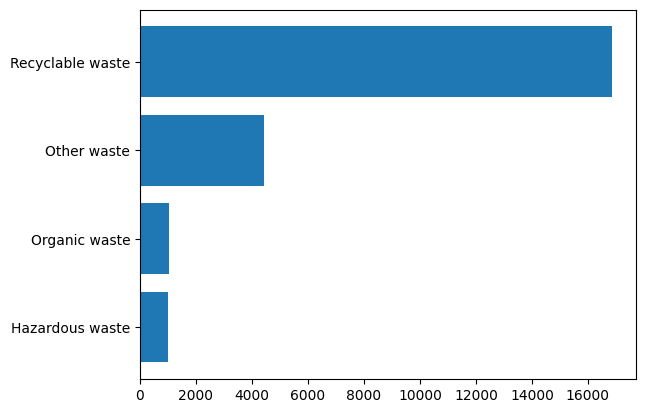

In [3]:
y_pos = np.arange(len(labels))
plt.barh(y_pos, num_images, align='center')
plt.yticks(y_pos, labels)
plt.show()

## Split into train and test sets

After the data statistics process, I will divide the data into 2 sets of Train and Test according to the familiar ratio of 80% for the train and 20% for the test. To divide the data into 2 sets, I define the following function:

In [30]:
# Tạo thư mục train và test
categ = ['Hazardous waste', 'Organic waste', 'Other waste', 'Recyclable waste']
path = 'DATA_clean'
df = []

for i in categ:
    path1 = os.path.join(path,i)
    for img in os.listdir(path1):
        df.append((img, i))
random.shuffle(df) # xáo trộn dữ liệu
df = pd.DataFrame(df, columns=['image', 'category'])
df.head()


,image,category
0,clothes_5117.jpg,Recyclable waste
1,00002788.jpg,Other waste
2,plastic_919.jpg,Recyclable waste
3,00002360.jpg,Other waste
4,paper_2261.jpg,Recyclable waste


In [31]:
X = df['image']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

